In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
import obspy
import obspy.signal
from obspy import read
from obspy.imaging.spectrogram import spectrogram
from obspy.signal.cross_correlation import correlate,xcorr_max
import numpy as np
import copy
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [21]:
#st=read("Island/*.SAC")
#st
st=read('2014_Sept_6-10/HL.NISR..HHZ.D.2014.249.235957.SAC')
dt = st[0].stats.starttime
st

1 Trace(s) in Stream:
HL.NISR..HHZ | 2014-09-06T23:59:57.330000Z - 2014-09-08T00:00:01.760000Z | 100.0 Hz, 8640444 samples

In [22]:
sli=st[0].slice(starttime=dt + 3600*2 + 60*41 + 15, endtime=dt + 3600*2 + 60*43 + 0);

<IPython.core.display.Javascript object>


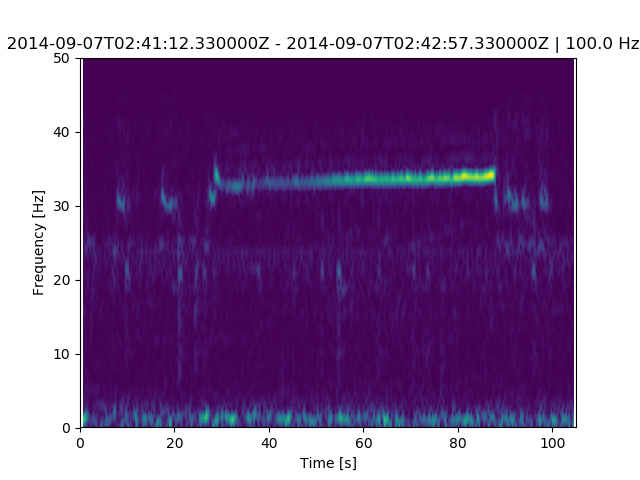

In [23]:
sli.spectrogram()

<IPython.core.display.Javascript object>


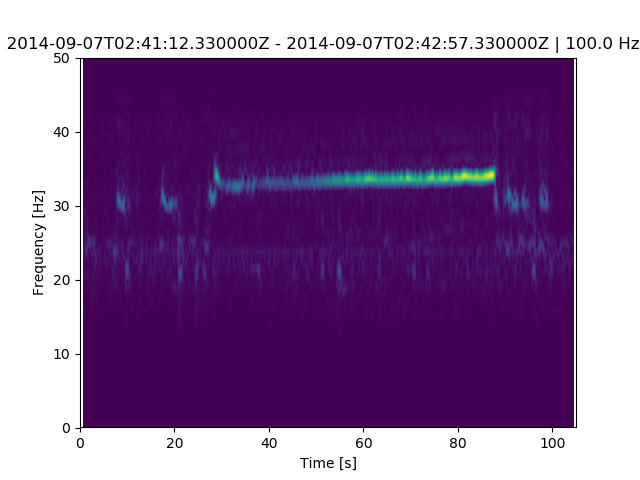

In [24]:
slif=sli.filter("highpass",freq=20)
slif.spectrogram()

<IPython.core.display.Javascript object>


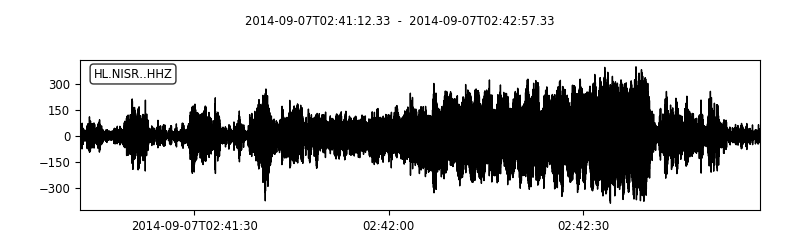

In [25]:
slif.plot()

<IPython.core.display.Javascript object>


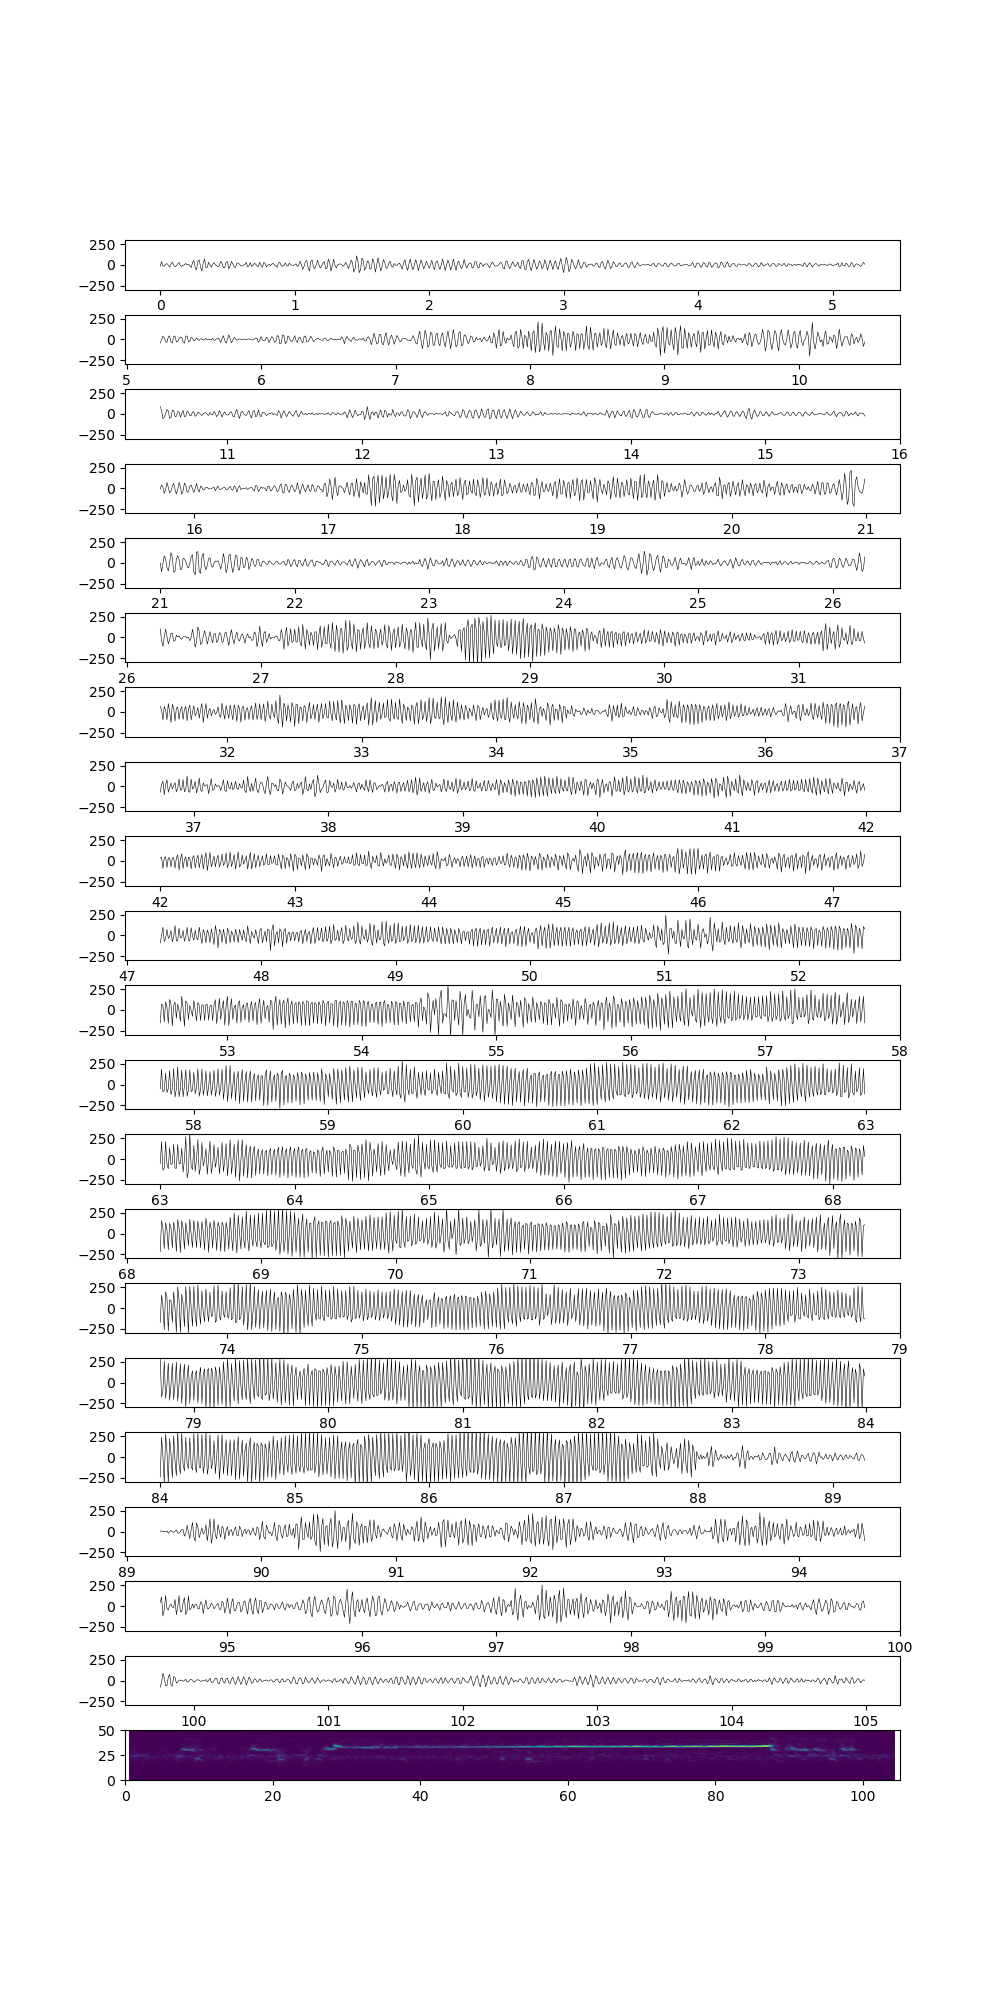

In [29]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
i=0
fig, ax = plt.subplots(21,1,figsize=(10,20))
plt.subplots_adjust(hspace=.5)
#make time vector
t = np.arange(slif.stats.npts) / slif.stats.sampling_rate
tstart=slif.stats.starttime
#plot waveform (top subfigure)    
nn=len(slif.data)
l=int(nn/20);
for i in range(20):
    ax[i].plot(t[i*l:(i+1)*l], slif.data[i*l:(i+1)*l],'k',linewidth=0.4)
    ax[i].set_ylim(-300,+300)
#     ax[1].plot(t[l:2*l], slif.data[l:2*l], 'k',linewidth=0.1)
#     ax[2].plot(t[2*l:3*l], slif.data[2*l:3*l], 'k',linewidth=0.1)
#     ax[3].plot(t[3*l:4*l], slif.data[3*l:4*l], 'k',linewidth=0.1)
#     ax[4].plot(t[4*l:5*l], slif.data[4*l:5*l], 'k',linewidth=0.1)
#ax1.set_xlim(100,200)
#ax1.set_title(str(tstart+100)[0:25])
#plot spectrogram (bottom subfigure)
#slif.spectrogram(axes=ax2, log=True, clip=([0,.4]));
slif.spectrogram(axes=ax[20], clip=([0,.4]));
#spl2 = st[i]
#spl2.spectrogram(show=False, axes=ax2, log=True)
#ax2.set_xlim(100,200)
#mappable = ax2.images[0]
#plt.colorbar(mappable=mappable, cax=ax3)

In [33]:
plt.savefig('myplot.png')
plt.savefig('myplot.pdf')

<IPython.core.display.Javascript object>


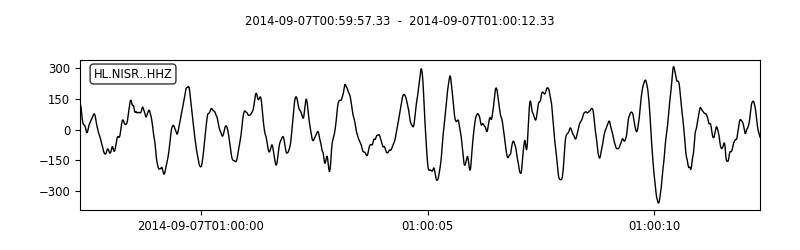

In [28]:
sts=copy.copy(st[0]);
dt = sts.stats.starttime
sts.filter("highpass",freq=.5)
sts.filter("lowpass",freq=8)
sts.plot(starttime=dt + 60*59+60, endtime=dt + 60*60 + 15,handle=True);

In [6]:
def tupac(i):
    t1=120;t2=150;
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.5, 0.7, 0.45]) #[left bottom width height]
    ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.35], sharex=ax1)
    #ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])
    #make time vector
    t = np.arange(st[i].stats.npts) / st[i].stats.sampling_rate
    tstart=st[i].stats.starttime
    #plot waveform (top subfigure)    
    ax1.plot(t, st[i].data, 'k')
    ax1.set_xlim(t1,t2)
    ax1.set_title(str(tstart)[0:25])
    #plot spectrogram (bottom subfigure)
    spl2 = st[i]
    spl2.spectrogram(show=False, axes=ax2, log=True)
    ax2.set_xlim(t1,t2)
    #mappable = ax2.images[0]
    #plt.colorbar(mappable=mappable, cax=ax3)
    fig.savefig('./Figures/f'+str(i)+'.png')
    plt.close(fig)conda install obspy

In [ ]:
plt.ioff()
for i in range(500,600):
    print(i)
    tupac(i)

# Day long

In [127]:
day=read('Package_1548785116914_1.mseed')
day0=copy.copy(day[0])
dt=day0.stats.starttime
dte=day0.stats.endtime

In [ ]:
i=0
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.7, 0.45]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.35], sharex=ax1)
#make time vector
t = np.arange(st[i].stats.npts) / st[i].stats.sampling_rate
tstart=st[i].stats.starttime
#plot waveform (top subfigure)    
ax1.plot(t, st[i].data, 'k')
#ax1.set_xlim(100,200)
ax1.set_title(str(tstart+100)[0:25])
#plot spectrogram (bottom subfigure)
st[i].spectrogram(axes=ax2, log=True, clip=([0,.4]));
#spl2 = st[i]
#spl2.spectrogram(show=False, axes=ax2, log=True)
#ax2.set_xlim(100,200)
#mappable = ax2.images[0]
#plt.colorbar(mappable=mappable, cax=ax3)

In [130]:
dt,dte,dt+3600

(2014-09-04T23:59:59.130000Z,
 2014-09-07T00:00:00.730000Z,
 2014-09-05T00:59:59.130000Z)

<IPython.core.display.Javascript object>


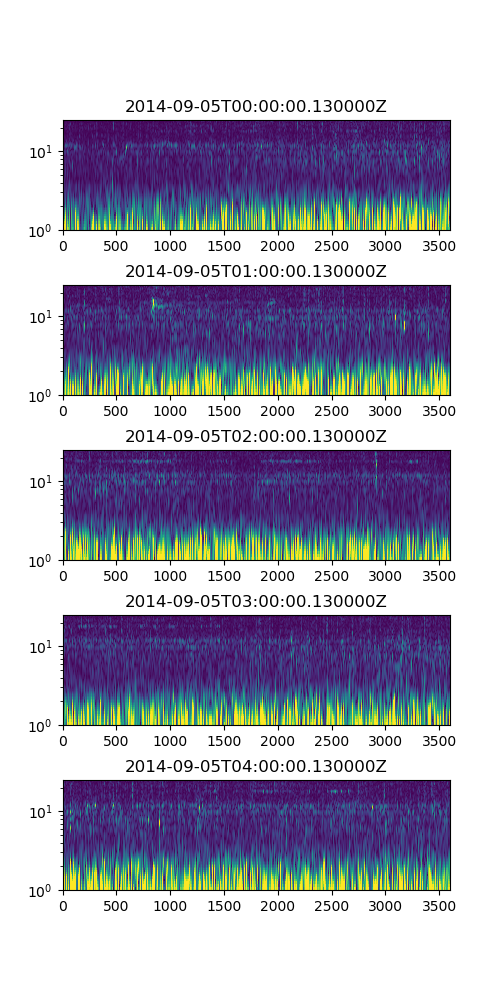

In [131]:
np=5;
daysl=[day0.slice(dt+1+3600*i, dt+1+3600*(i+1)) for i in range(np)]
fig,ax = plt.subplots(np,1,figsize=(5,10));
for i in range(np):
    dts=daysl[i].stats.starttime
    daysl[i].spectrogram(log=True,clip=([0,.2]),axes=ax[i]);ax[i].set_ylim([1,25])
    ax[i].set_title(str(dts))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

<IPython.core.display.Javascript object>


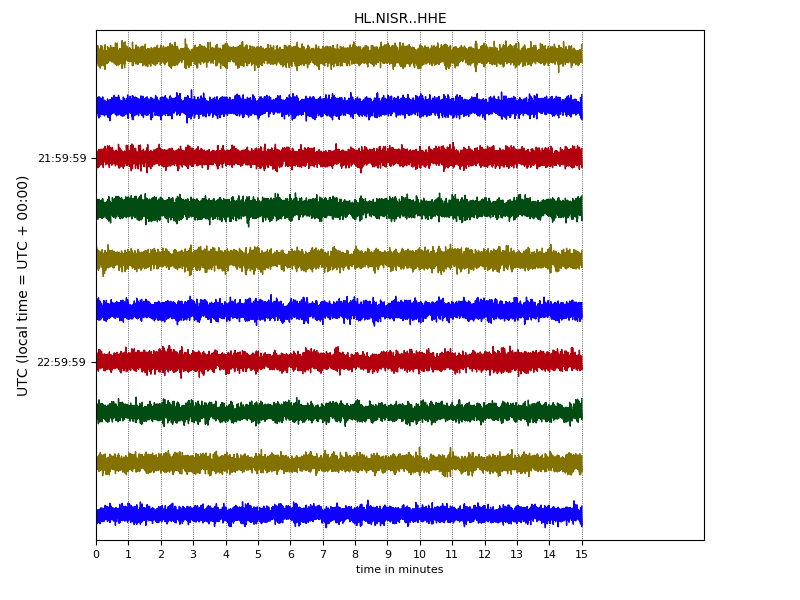

In [92]:
fig=day[0].plot(type='dayplot',handle=True)
ax=fig.axes[-1]
ax.set_ylim([0,10]);
ax.set_xlim([0, 1000]);

# Correlation between two seismograms

In [ ]:
from obspy.signal.cross_correlation import correlate,xcorr_max
#cc=correlate(st[564],st[565],int(len(st[564])/2))
cc=correlate(st[564],st[565],10000)

<IPython.core.display.Javascript object>


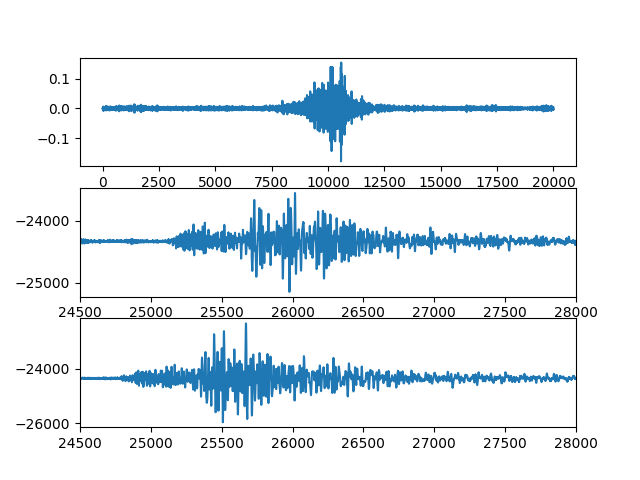

(24500, 28000)

In [30]:
fig,ax=plt.subplots(3,1)
ax[0].plot(cc)
ax[1].plot(st[564])
ax[2].plot(st[565])
ax[1].set_xlim(24500,28000)
ax[2].set_xlim(24500,28000)

In [42]:
sh=xcorr_max(cc, abs_max=True)
print(sh[0]/2,sh[1])

289.0 -0.17900529520560757


<IPython.core.display.Javascript object>


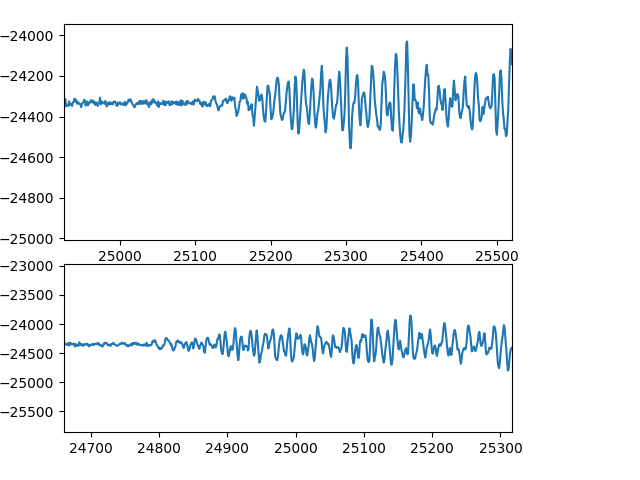

(24500, 28000)

In [43]:
%matplotlib notebook
fig=plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.7, 0.45]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.35])
ax1.plot(st[564]);ax1.set_xlim(24500+sh[0]/2,28000+sh[0]/2)
ax2.plot(st[565]);ax2.set_xlim(24500,28000)

Self-correlation (test):

<IPython.core.display.Javascript object>


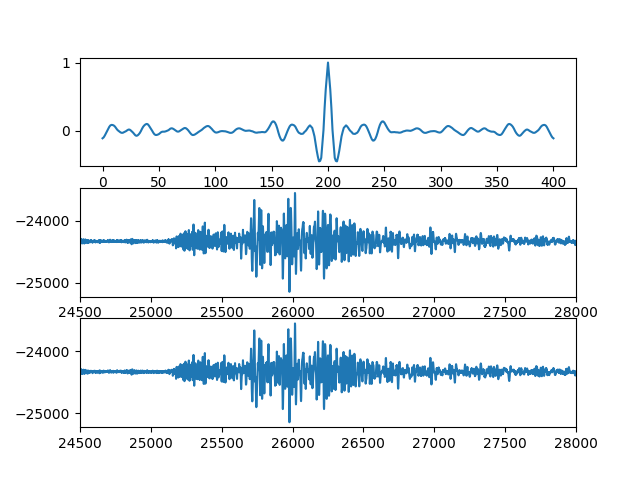

0.0 0.9999999668331175


In [7]:
ca=correlate(st[564],st[564],200)
#
fig,ax=plt.subplots(3,1)
ax[0].plot(ca)
ax[1].plot(st[564])
ax[2].plot(st[564])
ax[1].set_xlim(24500,28000)
ax[2].set_xlim(24500,28000)
#
sh=xcorr_max(ca, abs_max=True)
print(sh[0]/2,sh[1])

# Correlation between any two traces

539 # 599 # -40.5 # 0.32558028762986424


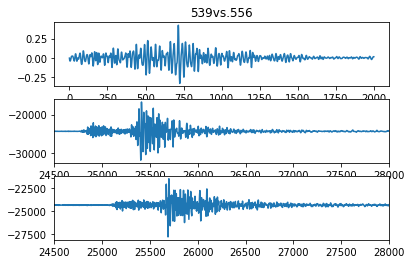

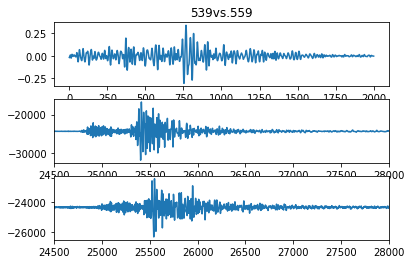

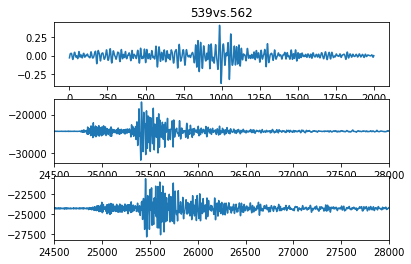

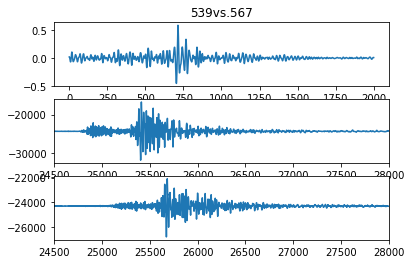

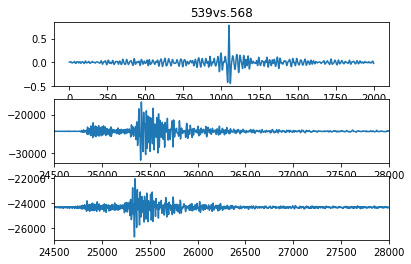

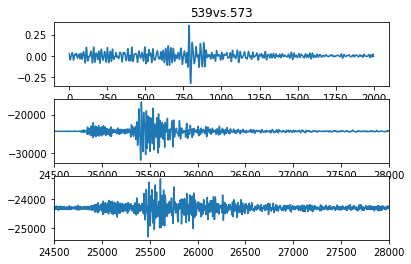

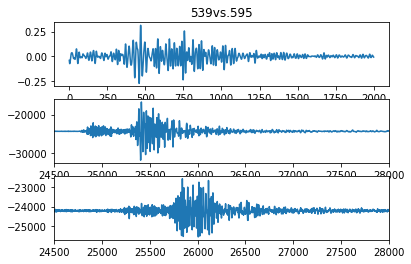

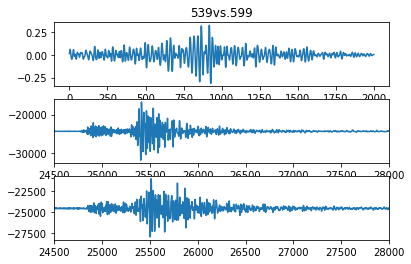

In [13]:
from IPython.display import display, clear_output
i=539
for j in range(550,600):
    ca=correlate(st[i],st[j],1000)
    sh=xcorr_max(ca, abs_max=True)
    clear_output(wait=True)
    print(i,"#",j,"#",sh[0]/2,"#",sh[1])
    if sh[1]>.3 :
        fig,ax=plt.subplots(3,1)
        ax[0].plot(ca);ax[0].set_title(str(i)+"vs."+str(j))
        ax[1].plot(st[i])
        ax[2].plot(st[j])
        ax[1].set_xlim(24500,28000)
        ax[2].set_xlim(24500,28000)
        fig.savefig("corr"+str(i)+"VS"+str(j)+".png")
        #break
#

# Old stuff

In [ ]:
from datetime import datetime  
from datetime import timedelta  
dt+timedelta(seconds=140)

In [ ]:
for i in range(0,20):
    tupac(i)

In [ ]:
for i in range(0,len(st),70):
    print(i)
    dt = st[i].stats.starttime
    tr=st[i][0]
    st[i].plot(starttime=dt + 80, endtime=dt + 60 + 240)
    st[i].spectrogram(log=True)
        #plt.show()

In [ ]:
import time
try:
    for i in range(0,len(st),70):
        print(i)
        dt = st[i].stats.starttime
        st[i].plot(starttime=dt + 80, endtime=dt + 60 + 240)
        st[i].spectrogram(log=True)
        #plt.show()
except KeyboardInterrupt:
    pass

In [ ]:
st[2].spectrogram()
st[2].plot()

In [ ]:
tr = st[22]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()

In [ ]:
st_filt = st[22].copy()
st_filt.filter('lowpass', freq=10, corners=2, zerophase=True)
st_filt.filter('highpass', freq=1, corners=2, zerophase=True)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(st_filt.times("matplotlib"), st_filt.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()

In [ ]:
st2=read("Short/*.SAC")

In [ ]:
import time
fig,ax=plt.subplots()
plt.ion()
fig.show()
fig.canvas.draw()

try:
    for i in range(11,13):
        ax.clear()
        print(i+1)
        dt = st2[i].stats.starttime
        #st2[i].plot(starttime=dt + 80, endtime=dt + 60 + 240)
        #st2[i].spectrogram(log=True)
        ax.plot(st2[i].times("matplotlib"),st2[i].data)
        fig.canvas.draw()
        time.sleep(0.5);
except KeyboardInterrupt:
    pass

In [ ]:
fig,ax=plt.subplots()
ax.plot(st2[195].times("matplotlib"),st2[195].data)
fig.show()
fig.canvas.draw()

In [ ]:
dt = st2[195].stats.starttime
st_filt = st2[195].copy()
st_filt.filter('lowpass', freq=4, corners=2, zerophase=True)
st_filt.plot(starttime=dt + 120, endtime=dt + 180 ,title=str(i))

In [ ]:
import time
fig,ax=plt.subplots()
plt.ion()
fig.show();
fig.canvas.draw();
try:
    for i in [195,200,201,201]:
        fig.clear();
        dt = st2[i].stats.starttime
        st_filt = st2[i].copy()
        st_filt.filter('lowpass', freq=4, corners=2, zerophase=True)
        st_filt.plot(starttime=dt + 80, endtime=dt + 60 + 240, fig=fig,title=str(i))
        plt.title(str(i))
        #ax.plot(st2[i].times("matplotlib"),st2[i].data)
        #ax=plt.gca()
        #fig=plt.gcf()
        fig.canvas.draw();
        time.sleep(2);
except KeyboardInterrupt:
    pass

In [ ]:
for i in [47,48,51,52,103,107,187,195,200,201,201,211]:
    st2[i].spectrogram(log=True)
    plt.title(str(i))

In [ ]:
ax

In [ ]:
st2[40].spectrogram()

In [ ]:
st2[2]

In [ ]:
120*60*100

In [13]:
slp=read("HL.NISR..HHZ.D.2014.230.023348.SAC")

<IPython.core.display.Javascript object>


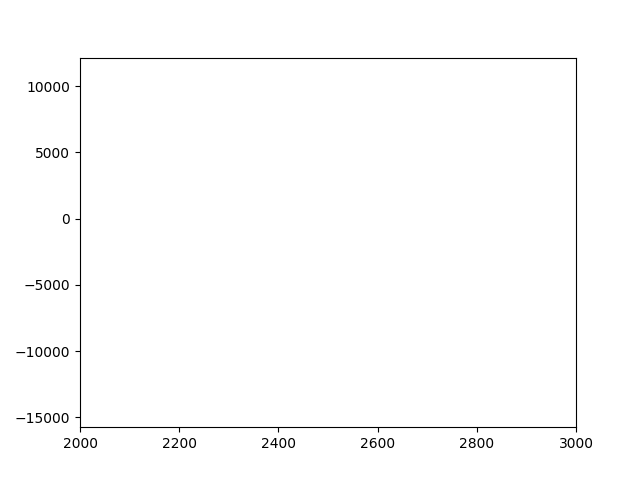

(2000, 3000)

In [21]:
fig,ax=plt.subplots(1,1)
ax.plot(slp)
ax.set_xlim(2000,3000)
#ax=slp.plot()
#slp.spectrogram(log=True)
#ax.set_xlim(2000,10000)

In [ ]:
def Old_tupac(i,pmi,pma):
    from datetime import datetime  
    from datetime import timedelta  
    tr = st[i]
    nn=len(tr);
    tstart=tr.stats.starttime
    dt = tr.stats.delta
    stim=tstart+pmi
    etim=tstart+pma
    st_filt = tr.copy()
    #st_filt.filter('lowpass', freq=20, corners=2, zerophase=True)
    #st_filt.filter('highpass', freq=1, corners=2, zerophase=True)
    %matplotlib notebook
    fig,(ax1,ax2) = plt.subplots(2,1)
    ax1.plot(st_filt.times("matplotlib"),st_filt.data,'k-')
    #xlims1=ax1.get_xlim()
    #ax1.set_xlim(xlims1[0]+pmi,xlims1[1]+pma)
    #ax1.xaxis_date();
    ax1.set_title(str(tstart)[0:10])
    #fig.autofmt_xdate()
    tr.spectrogram(axes=ax2,log=True)
    #xlims2=ax2.get_xlim();xd=xlims2[1]-xlims2[0];
    #ax2.set_xlim(xlims2[0]+pmi*xd,xlims2[0]+pma*xd)
    #ax2.set_xlim(pmi,pma)
    #ax2.set_ylim(.1,30)
    fig.savefig('./Figures/f'+str(i)+'.png')   
    return tstart